# <div style="text-align: center"> Taller 4 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
import soundfile as sf
import os

### 1. Conceptos básicos de la Transformada Rápida de Fourier

A continuación se puede apreciar la rutina de la transformada rápida de Fourier para un dominio de $L=20$ y con $n$ puntos para una función Gaussiana dada por:

$f(x)=e^{-x^2}$


In [3]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]

u=np.exp(-(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

Dentro de los algoritmos de Fourier implementados en Numpy se destacan los siguientes:

* **FFT**: Realiza la transformada rápida de Fourier dado un arreglo de números.  


* **IFFT**: Realiza una transformada inversa devolviendo la función original dado un arreglo de numeros transformados por Fourier. 


* **FFTSHIFT**: Cambia la función transformada a sus posiciones matemáticamente correctas.  


* **IFFTSHIFT**: Es la función inversa de FFTSHIFT, es decir devuelve la función a sus posiciones originales.

En la siguiente celda de código se generan las gráficas para la función original, su transformada original, su transformada con pulsos invertidos y el valor absoluto de esta última.

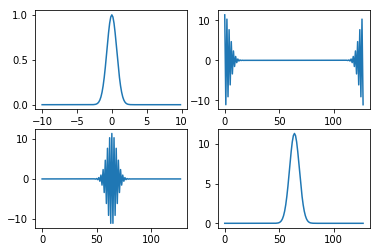

In [4]:
plt.subplot(221)
plt.plot(x,u)
plt.subplot(222)
plt.plot(np.real(ut))
plt.subplot(223)
plt.plot(np.real(utshift))
plt.subplot(224)
plt.plot(np.abs(utshift))
plt.show()

### 2. Derivación por FFT, DDFF y exacta.

Con el objetivo de ilustrar cómo se puede utilizar la trasnformada rápida de Fourier para derivar, se utilizó la siguiente función:

$u(x)=sech(x)$

Por lo tanto, sus derivadas con respecto a x serían:

$u'(x)=-sech(x)tanh(x)$

$u''(x)=sech(x)-2sech^3(x)$

En la siguiente celda de código se puede apreciar la primera y segunda derivada de la función mediante sus expresiones exactas, metodos de diferencias finitas de segundo y caurto orden y TFF.

In [5]:
L=20
n=128
x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
dx=x[1]-x[0]
u=1/np.cosh(x)
ut=np.fft.fft(u)
k1=(2*np.pi/(L))*np.linspace(0,(n/2-1),64)
k2=(2*np.pi/(L))*np.linspace((-n/2),-1,64)
k=np.append(k1,k2)

#Derivadas por FFT
ut1=1j*ut*k
ut2=-k*k*ut
u1=np.real(np.fft.ifft(ut1))
u2=np.real(np.fft.ifft(ut2))
u1exact=(-1/np.cosh(x))*np.tanh(x)
u2exact=(1/np.cosh(x))-2*((1/np.cosh(x))**3)

#Derivadas por DDFF de 2do orden
ux=[]
ux=np.append(ux,(-3*u[0]+4*u[1]-u[2])/(2*dx))
for i in range(1,n-1):
    ux=np.append(ux,(u[i+1]-u[i-1])/(2*dx))
ux=np.append(ux,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))    

#Derivadas por DDFF de 4to orden
ux2=[]
ux2=np.append(ux2,(-3*u[0]+4*u[1]-u[2])/(2*dx))
ux2=np.append(ux2,(-3*u[1]+4*u[2]-u[3])/(2*dx))
for i in range(2,n-2):
    ux2=np.append(ux2,(-u[i+2]+8*u[i+1]-8*u[i-1]+u[i-2])/(12*dx))
ux2=np.append(ux2,(3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2=np.append(ux2,(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))

A continuación se muestran los resultados de las derivaciones. Es evidenciable que los dos metodos concuerdan con la derivación exacta. Vale aclarar que las derivadas obtenidas mediante FFT únicamente son confiables si la función es derivada entre limites periódicos.

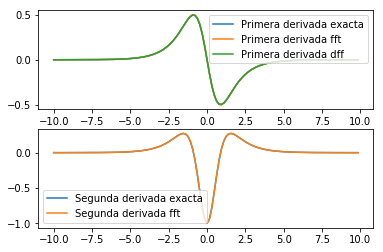

In [6]:
plt.subplot(211)
plt.plot(x,u1exact,label='Primera derivada exacta')
plt.plot(x,u1,label='Primera derivada fft')
plt.plot(x,ux,label='Primera derivada dff')
plt.legend()
plt.subplot(212)
plt.plot(x,u2exact,label='Segunda derivada exacta')
plt.plot(x,u2,label='Segunda derivada fft')
plt.legend(loc='lower left')
plt.show()

### 3. Aplicaciondes de la FFT: Detección de radar y filtrado

La transformada rápida de Fourier ha mostrado tener aplicaciones amplias para el procesamiento de señales. Acontinuación se da un ejemplo de una señal con ruido implementado y cómo se puede aplicar un filtro para disminuir dicho ruido.

In [7]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k1=(2*np.pi/(2*L))*np.linspace(0,(n/2-1),256)
k2=(2*np.pi/(2*L))*np.linspace((-n/2),-1,256)
k=np.append(k1,k2)
u=(1/np.cosh(t))
noise=10
ut=np.fft.fft(u)
unt=ut+noise*(np.random.rand(n)+1j*np.random.rand(n))
un=np.fft.ifft(unt)
un[0]=0.2
filt=np.exp(-0.1*(k**2))
unft=filt*unt
unf=np.fft.ifft(unft)

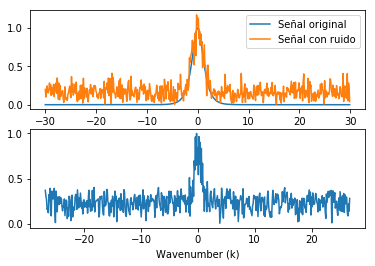

In [12]:
plt.subplot(211)
plt.plot(t,u,label='Señal original')
plt.plot(t,np.abs(un),label='Señal con ruido')
plt.legend(loc='upper right')
plt.subplot(212)
plt.xlabel('Wavenumber (k)')
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unt))/max(np.abs(np.fft.fftshift(unt))))
plt.show()

Para la disminución del ruido es posible aplicar un filtro Gaussiano simple como el mostrado a continuación:

$F(k)=e^{-\tau(k-k_0)^2}$

Dicho filtro es aplicado sobre la función transformada la cual es posteiormente invertida para retomar la función original sin ruido. A continuación se muestra las figuras del antes y después de la señal filtrada además de la señal filtrada en el dominio de la frecuencia:

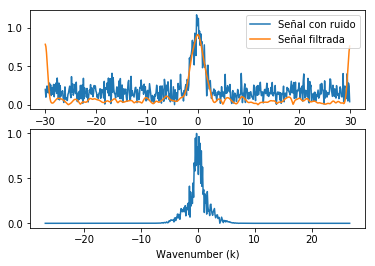

In [17]:
plt.subplot(211)
plt.plot(t,np.abs(un),label='Señal con ruido')
plt.plot(t,np.abs(unf),label='Señal filtrada')
plt.legend(loc='upper right')
plt.subplot(212)
plt.plot(np.fft.fftshift(k),np.abs(np.fft.fftshift(unft))/max(np.abs(np.fft.fftshift(unft))))
plt.xlabel('Wavenumber (k)')
plt.show()

### 4. Aplicaciondes de la FFT: Detección de radar y promediamiento

In [80]:
L=30
n=512
t2=np.linspace(-L,L,n+1)
t=t2[0:n]
k1=(2*np.pi/(2*L))*np.linspace(0,(n/2-1),256)
k2=(2*np.pi/(2*L))*np.linspace((-n/2),-1,256)
k=np.append(k1,k2)
ks=np.fft.fftshift(k)
noise=10

r=100
u=(1/np.cosh(t))
ave4=np.zeros((1,n))
ut=np.fft.fft(u)

unt=ut+noise*(np.random.rand(n)+1j*np.random.rand(n))
ave4=ave4+unt
dat=np.abs(np.fft.fftshift(unt))/max(np.abs(unt))
un=np.fft.ifft(unt)
ave4=np.abs(np.fft.fftshift(ave4))/r




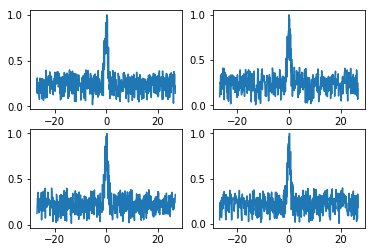

In [82]:
plt.subplot(221)
plt.plot(ks,ave1[0]/np.max(ave1))
plt.subplot(222)
plt.plot(ks,ave2[0]/np.max(ave2))
plt.subplot(223)
plt.plot(ks,ave3[0]/np.max(ave3))
plt.subplot(224)
plt.plot(ks,ave4[0]/np.max(ave4))
plt.show()

In [85]:
unt[:]

array([ 33.07238023 +4.27128995e+00j, -21.01567993 +4.95790159e+00j,
        34.61781562 +1.43594969e-01j, -22.79959536 +9.62340883e+00j,
        26.20863999 +5.29979163e+00j, -17.98887075 +5.07252520e+00j,
        27.46362983 +3.35080072e+00j, -11.19910180 +4.37697362e+00j,
        19.46483807 +6.43394730e+00j,  -3.29006921 +4.32700322e+00j,
        15.19206293 +2.05197627e+00j,  -8.02079391 +9.95341193e+00j,
        13.22563889 +8.81400640e+00j,  -5.83530454 +7.20947659e+00j,
        14.92293262 +1.56957791e+00j,   3.00367666 +1.21403243e+00j,
        12.32283663 +6.10826157e+00j,   6.67358909 +3.16763871e+00j,
         4.33618875 +6.49784946e+00j,  -0.71789840 +5.90082477e+00j,
         9.71436762 +3.95051980e+00j,   4.52825680 +6.58684248e+00j,
         8.93525642 +1.80187110e+00j,  -0.32700746 +5.49428664e-01j,
         6.55896793 +8.93757841e-01j,   4.26734578 +8.59710819e+00j,
         9.48910513 +6.87430552e+00j,   5.96180813 +4.66572560e+00j,
         3.65528761 +3.11572981e+0

### 5. Ejemplo práctico

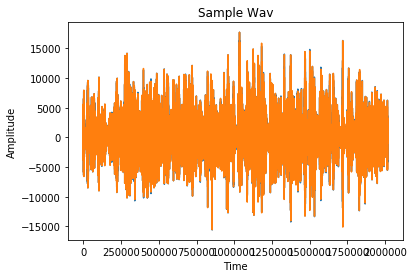

In [87]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt


input_data = read("sample.wav.wav")
audio = input_data[1][16608000:18624000]
plt.plot(audio)

plt.ylabel("Amplitude")
plt.xlabel("Time")

plt.title("Sample Wav")

plt.show()

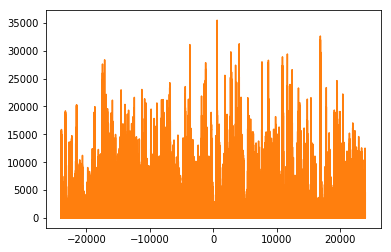

In [104]:
n = len(audio)
timestep = 1/48000
W = np.fft.fftfreq(n, d=timestep)
f_signal = np.fft.fftpack.rfft(audio)
f_shift=np.fft.fftshift(f_signal)

plt.plot(W,np.abs(f_shift))
plt.show()

cut_f_signal = f_signal.copy()

filt=np.exp(-0.5*(W)**2)
a=cut_f_signal[:,0]*filt
b=cut_f_signal[:,1]*filt
c= np.column_stack((a,b))

cut_signal =  np.fft.fftpack.irfft(c)


In [102]:
W

array([ 0.        ,  0.02380952,  0.04761905, ..., -0.07142857,
       -0.04761905, -0.02380952])

In [100]:
cut_signal

array([[-506.        , -482.        ],
       [-491.86056398, -451.87190024],
       [-429.51274793, -405.53994339],
       ..., 
       [ 962.54140261,  911.67133884],
       [ 802.09008508,  749.15014173],
       [ 579.8356242 ,  526.85064475]])

In [228]:
sp.io.wavfile.write('2.wav', 48000, audio)